In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("house_prices_dataset.csv")
df

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903
...,...,...,...,...,...
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379


In [11]:
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [13]:
df.tail()

,square_feet,num_rooms,age,distance_to_city(km),price
9995,2650.551032,7,9,18.126034,431344.267823
9996,1000.827516,2,53,24.479692,6650.271134
9997,1647.341638,5,80,2.189312,233698.384301
9998,2247.882787,6,73,27.931014,280766.827379
9999,2322.194227,7,73,10.595721,342895.309114


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   square_feet           10000 non-null  float64
 1   num_rooms             10000 non-null  int64  
 2   age                   10000 non-null  int64  
 3   distance_to_city(km)  10000 non-null  float64
 4   price                 10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [17]:
df.isnull().sum()

square_feet             0
num_rooms               0
age                     0
distance_to_city(km)    0
price                   0
dtype: int64

array([[<Axes: title={'center': 'square_feet'}>,
        <Axes: title={'center': 'num_rooms'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'distance_to_city(km)'}>],
       [<Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

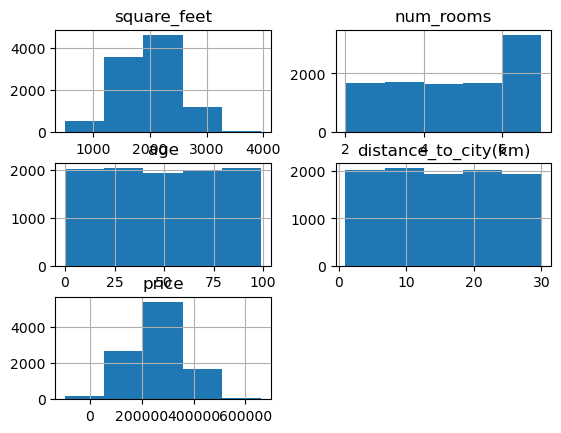

In [19]:
df.hist(bins=5)

In [21]:
df.corr()

,square_feet,num_rooms,age,distance_to_city(km),price
square_feet,1.000000,-0.006982,0.009760,0.004638,0.756545
num_rooms,-0.006982,1.000000,0.005636,0.016747,0.335230
age,0.009760,0.005636,1.000000,0.011175,-0.290799
distance_to_city(km),0.004638,0.016747,0.011175,1.000000,-0.418217
price,0.756545,0.335230,-0.290799,-0.418217,1.000000


In [53]:
from sklearn.model_selection import train_test_split # it split the dataset into 80 :20 as training and testing data 
from sklearn.linear_model import LinearRegression #logistic model is used due to clasify the things into two values 0 and 1
from sklearn.preprocessing import StandardScaler# standard scaler is used to scale my features according to z-score.
from sklearn.metrics import accuracy_score,r2_score# here with this performance metrices

In [35]:
# to find outliers in Age
col="distance_to_city(km)"# to find how many outliers
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
outliers = df[(df[col]<lower_bound)| (df[col]>upper_bound)]
print(outliers.shape[0])

0


In [31]:
col="square_feet" 
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [37]:
X=df.drop("price",axis=1)# X is features that we will be having to use to predict y.  ###axis=1 is used for one  dimension 
Y=df["price"]

In [39]:
X

,square_feet,num_rooms,age,distance_to_city(km)
0,2248.357077,3,92,22.997972
1,1930.867849,2,22,13.984254
2,2323.844269,6,33,21.500945
3,2761.514928,3,63,10.343638
4,1882.923313,7,54,25.485200
...,...,...,...,...
9995,2650.551032,7,9,18.126034
9996,1000.827516,2,53,24.479692
9997,1647.341638,5,80,2.189312
9998,2247.882787,6,73,27.931014


In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [43]:
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train) 
X_test_scale = scaler.transform(X_test)

In [49]:
model=LinearRegression() # this model is used when we give input and output
model.fit(X_train_scale,Y_train)#fit is used to feed  data to model

LinearRegression()

In [51]:
Y_pred=model.predict(X_test_scale)

In [55]:
r2 = r2_score(Y_test, Y_pred)
print("R² Score:", r2)

R² Score: 0.9598119805535221
